# COMP2002 Main Assignment
Machine Learning and Evolutionary Computation

In [1]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

## Part 1- Machine Learning

### 1.1 Data Preparation
The forest fire datasets are CSVs with the following fields:
<table><tr>
    <td>Day</td>
    <td>Month</td>
    <td>Year</td>
    <td>Temperature (degrees C)</td>
    <td>RH (Relative Humidity, %)</td>
    <td>WS (Wind speed, kmph)</td>
    <td>Rain (Total for day, mm)</td>
    <td>FFMC (Fine Fuel Moisture Code index)</td>
    <td>DMC (Duff Moisture Code index)</td>
    <td>DC (Drought Code index)</td>
    <td>ISI (Initial Spread Index)</td>
    <td>BUI (Buildup Index)</td>
    <td>FWI (Fire Weather Index)</td></tr></table>

In [2]:
# Read in forest fire datasets
ff_region1 = pandas.read_csv("datasets/AlgerianFF_Region1.csv")
ff_region2 = pandas.read_csv("datasets/AlgerianFF_Region2.csv")
ff_combined = pandas.concat([ff_region1, ff_region2])
# Normalise the data so that all features are in range 0-1, while also removing the year (every value is the same so it is not useful)
scaler = MinMaxScaler()  # Range 0-1 is default
ff_combined_inputs = scaler.fit_transform(ff_combined[["day", "month", "Temperature", " RH", " Ws", "Rain ", "FFMC", "DMC", "DC", "ISI", "BUI"]])
# Randomly split into training and testing data
ff_train_inputs, ff_test_inputs, ff_train_targets, ff_test_targets = train_test_split(ff_combined_inputs, ff_combined["FWI"], shuffle=True)

- The datasets for the two regions were combined and then randomly split into testing and training data (as opposed to using one region for training and the other for testing) in case there are any features that are not in the dataset that differentiate the two regions which could cause the models to overfit to the training region

### 1.2 Regression

In [3]:
# Random Forest Regressor
RF_regressor = RandomForestRegressor()
RF_regressor.fit(ff_train_inputs, ff_train_targets)

RandomForestRegressor()

In [4]:
# Neural Network
NN_regressor = MLPRegressor()
NN_regressor.fit(ff_train_inputs, ff_train_targets)

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor()

In [5]:
# Support Vector Machine
SVM_regressor = SVR()
SVM_regressor.fit(ff_train_inputs, ff_train_targets)

SVR()

### 1.3 Assessment of Regression

First, cross validation is used on the training data.  The results of this are then used to adjust the hyperparameters to improve performance.
- This is not done using the test data as otherwise the models might overfit to the test dataset (as it was used to tune the hyperparameters) so the test data would no longer give a reliable indication of how well the models generalise.

Once adjusting the hyperparameters no longer improves preformance on cross validation, the models are tested on the test data

c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\alex\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarnin

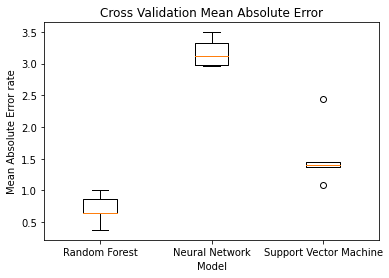

In [7]:
# Perform 5-fold cross validation 5 times and use the average to create a boxplot
RF_scores = [0.0] * 5
NN_scores = [0.0] * 5
SVM_scores = [0.0] * 5
for i in range(5):
    RF_scores += cross_val_score(RF_regressor, ff_train_inputs, ff_train_targets, scoring="neg_mean_absolute_error") # Use the metrics.mean_absolute_error function to generate scores.
    NN_scores += cross_val_score(NN_regressor, ff_train_inputs, ff_train_targets, scoring="neg_mean_absolute_error")
    SVM_scores += cross_val_score(SVM_regressor, ff_train_inputs, ff_train_targets, scoring="neg_mean_absolute_error")
RF_scores *= -0.2  # Divide by 5 to get the average and flip score to positive
NN_scores *= -0.2
SVM_scores *= -0.2

# Plot MAE from cross validation of each model as boxplots
plt.title("Cross Validation Mean Absolute Error")
plt.boxplot([RF_scores, NN_scores, SVM_scores], labels=["Random Forest", "Neural Network", "Support Vector Machine"])  # The scores used by cross_val_score are negative, so must be flipped to positive
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error rate")
plt.show()